In [133]:
pip install seaborn


***importing libraries*** 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
import numpy as np
import sqlite3
import folium
from geopy.geocoders import Nominatim 
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')


In [2]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


**Database Connection**


In [3]:
#creating database connection
conn=sqlite3.connect('yelp_21.db')

In [4]:
tables = pd.read_sql_query("select name from sqlite_master where type = 'table' ", conn)

In [5]:
tables

,name
0,business
1,checkin
2,review
3,tip
4,user


In [6]:
#explore what type of data available in the tables

for table in tables['name']:
    display(pd.read_sql_query(f"select * from {table} limit 5", conn))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


****Data Analysis****


In [7]:
pd.read_sql_query("select count(*) from business", conn)

,count(*)
0,150346


In [8]:
business_id = pd.read_sql_query(""" select business_id, review_count from business where lower(categories) like '%restaurant%' and is_open=1 """,conn )

In [9]:
 #what is the discriptive stats for rewiew count and star rating for business? 
#avg ,min , max, median 

pd.read_sql_query(f"""
select 
    avg(review_count) as avg_review_count, 
    min(review_count) as min_review_count, 
    max(review_count) as max_review_count,
    (
        select review_count 
        from business 
        order by review_count 
        limit 1
        offset (select count(*) from business) /2 ) as median_review_count ,


        
           avg(stars) as avg_stars_count, 
    min(stars) as min_stars_count, 
    max(stars) as max_stars_count,
    (
        select stars
        from business 
        order by stars 
        limit 1
        offset (select count(*) from business) /2 ) as median_review_count
from business where business_id IN {tuple(business_id['business_id'])} 
""", conn).transpose()


# avg_review_count	104.097789
# min_review_count	5.000000
# max_review_count	7568.000000 ----  outlier check the max and median 
# median_review_count	15.000000
# avg_stars_count	3.523969
# min_stars_count	1.000000
# max_stars_count	5.000000
# median_review_count	3.500000

,0
avg_review_count,104.097789
min_review_count,5.000000
max_review_count,7568.000000
median_review_count,15.000000
avg_stars_count,3.523969
min_stars_count,1.000000
max_stars_count,5.000000
median_review_count,3.500000


In [10]:
def remove_outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df= df[(df[col]>= lower_bound) & (df[col] <= upper_bound)]
    return df 

In [11]:
business_id = remove_outliers(business_id,'review_count')

In [12]:
business_id.shape

(31537, 2)

In [13]:
 #what is the discriptive stats for rewiew count and star rating for business? 
#avg ,min , max, median 

pd.read_sql_query(f"""
select 
    avg(review_count) as avg_review_count, 
    min(review_count) as min_review_count, 
    max(review_count) as max_review_count,
    (
        select review_count 
        from business 
        order by review_count 
        limit 1
        offset (select count(*) from business) /2 ) as median_review_count ,


        
           avg(stars) as avg_stars_count, 
    min(stars) as min_stars_count, 
    max(stars) as max_stars_count,
    (
        select stars
        from business 
        order by stars 
        limit 1
        offset (select count(*) from business) /2 ) as median_review_count
from business where business_id IN {tuple(business_id['business_id'])} 
""", conn).transpose()


,0
avg_review_count,55.975426
min_review_count,5.000000
max_review_count,248.000000
median_review_count,15.000000
avg_stars_count,3.477281
min_stars_count,1.000000
max_stars_count,5.000000
median_review_count,3.500000


In [14]:
#which of the restaurant has the higest number of review ?
pd.read_sql_query(f"""select name , sum(review_count)as review_count , avg(stars) as avg_rating 
from business
where business_id in {tuple(business_id['business_id'])}
group by name 
order by review_count desc 
limit 10 """,conn)

,name,review_count,avg_rating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7687,3.377419
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5744,2.514706


In [15]:
pd.read_sql_query(f"""select name , sum(review_count)as review_count , avg(stars) as avg_rating 
from business
where business_id in {tuple(business_id['business_id'])}
group by name 
order by avg_rating desc 
limit 10 """,conn)

,name,review_count,avg_rating
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


In [16]:
# Do resturents with higer engagement tend to have higer reating ?

pd.read_sql_query("""select business_id, SUM(LENGTH(date) - LENGTH(REPLACE(date, ',', '')) + 1) AS checkin_count
from checkin
group by business_id""" ,conn)  ##checkin count table 


,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


In [17]:
# find the total buisness_id 
pd.read_sql_query(""" select business_id , count(*) as tip_count from tip group by business_id""" , conn)

,business_id,tip_count
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--30_8IhuyMHbSOcNWd6DQ,1
3,--7PUidqRWpRSpXebiyxTg,3
4,--8IbOsAAxjKRoYsBFL-PA,4
...,...,...
106188,zzjCxn89a7RQo8keIOO_Ag,1
106189,zzjFdJwXuxBOGe9JeY_EMw,2
106190,zznJox6-nmXlGYNWgTDwQQ,6
106191,zzu6_r3DxBJuXcjnOYVdTw,2


In [18]:
review_count_df=pd.read_sql_query(f"""
    SELECT 
        Total.avg_rating AS rating,
        avg(Total.avg_review_count) AS avg_review_count,
        avg(Total.checkin_count) AS checkin_count,
        avg(Total.avg_tip_count) AS avg_tip_count
    FROM (
        SELECT 
            b.business_id, 
            AVG(b.stars) AS avg_rating,
            SUM(b.review_count) AS avg_review_count,
            SUM(LENGTH(date) - LENGTH(REPLACE(date, ',', '')) + 1) AS checkin_count,
            SUM(tip.tip_count) AS avg_tip_count
        FROM business b
        LEFT JOIN checkin cc ON b.business_id = cc.business_id
        LEFT JOIN (
            SELECT business_id, COUNT(business_id) AS tip_count 
            FROM tip 
            GROUP BY business_id
        ) AS tip ON b.business_id = tip.business_id
        WHERE b.business_id IN {tuple(business_id['business_id'])}
        GROUP BY b.business_id
    ) AS Total

    GROUP BY total.avg_rating
""", conn)


In [19]:
review_count_df

,rating,avg_review_count,checkin_count,avg_tip_count
0,1.0,14.365079,17.518072,2.781513
1,1.5,24.358459,34.480969,3.884654
2,2.0,27.759629,52.386515,4.581058
3,2.5,36.631037,79.349429,6.325225
4,3.0,48.054998,105.970405,8.301950
5,3.5,63.730125,125.781702,10.320786
6,4.0,73.136954,127.139075,11.329362
7,4.5,65.282554,86.177605,8.995201
8,5.0,31.127979,27.545113,4.269082


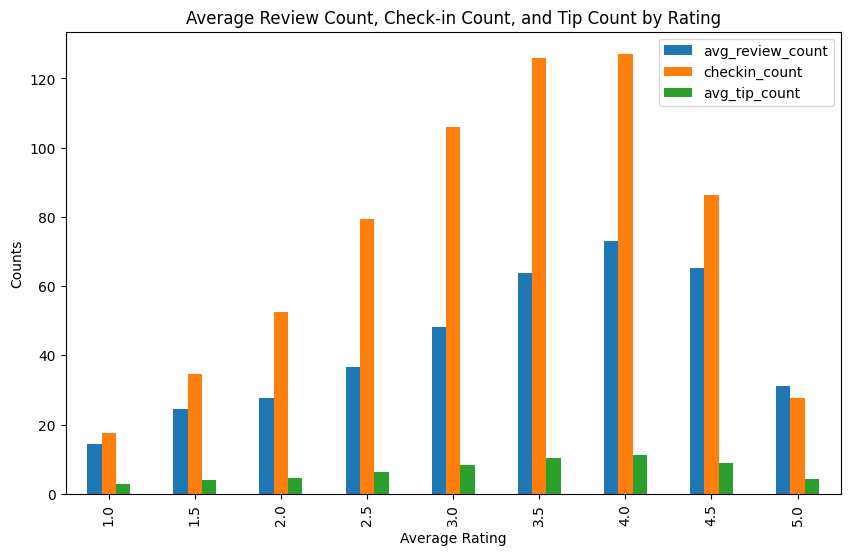

In [20]:
import matplotlib.pyplot as plt

# Plotting the bar graph
review_count_df.plot(kind='bar', x='rating', y=['avg_review_count', 'checkin_count', 'avg_tip_count'], figsize=(10, 6))

# Adding labels and title
plt.xlabel('Average Rating')
plt.ylabel('Counts')
plt.title('Average Review Count, Check-in Count, and Tip Count by Rating')

# Show plot
plt.show()


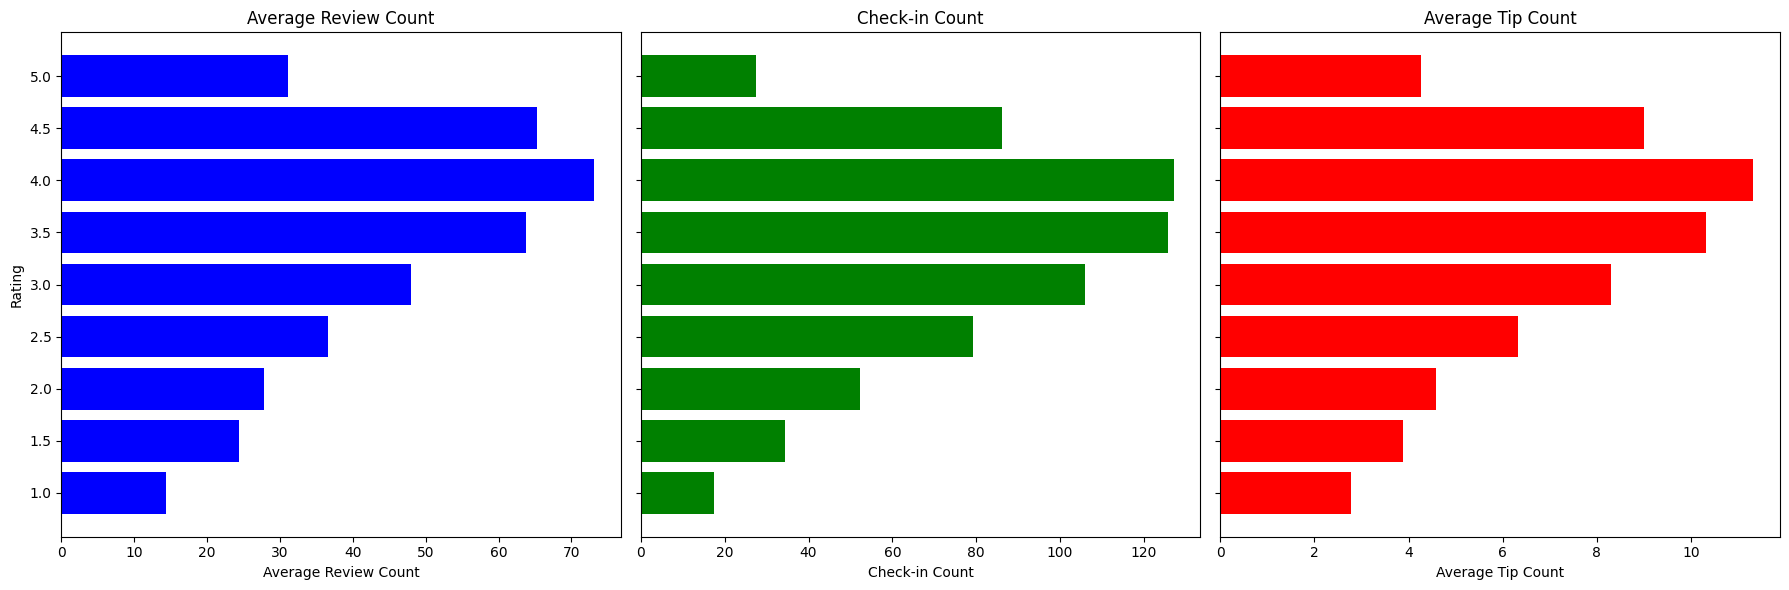

In [21]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot avg_review_count
axs[0].barh(review_count_df['rating'].astype(str), review_count_df['avg_review_count'], color='blue')
axs[0].set_title('Average Review Count')
axs[0].set_xlabel('Average Review Count')
axs[0].set_ylabel('Rating')

# Plot checkin_count
axs[1].barh(review_count_df['rating'].astype(str), review_count_df['checkin_count'], color='green')
axs[1].set_title('Check-in Count')
axs[1].set_xlabel('Check-in Count')

# Plot avg_tip_count
axs[2].barh(review_count_df['rating'].astype(str), review_count_df['avg_tip_count'], color='red')
axs[2].set_title('Average Tip Count')
axs[2].set_xlabel('Average Tip Count')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


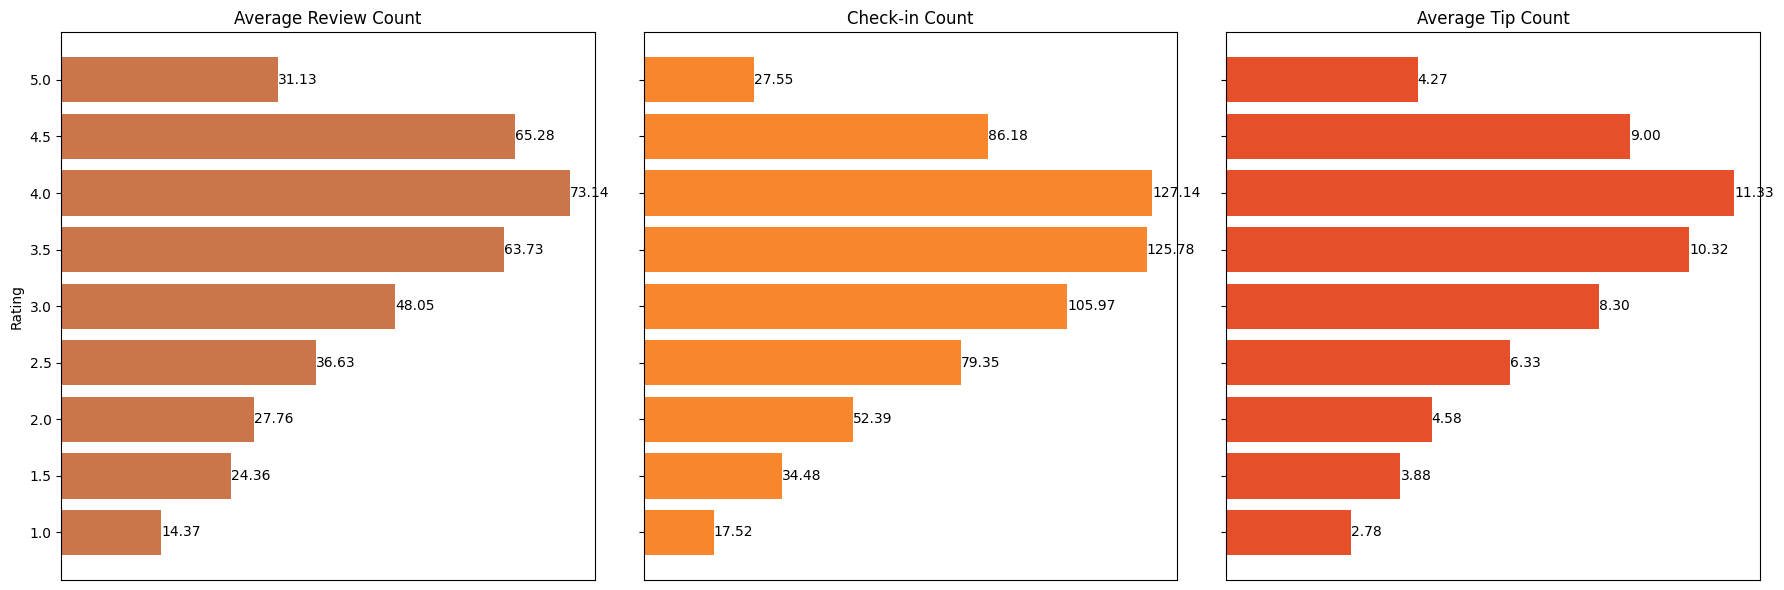

In [22]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot avg_review_count
axs[0].barh(review_count_df['rating'].astype(str), review_count_df['avg_review_count'], color='#CB754B')
axs[0].set_title('Average Review Count')
axs[0].set_xlabel('')  # Remove x-axis label
axs[0].set_ylabel('Rating')
axs[0].set_xticks([])  # Remove x-axis ticks
# Add data labels
for index, value in enumerate(review_count_df['avg_review_count']):
    axs[0].text(value, index, f'{value:.2f}', va='center')

# Plot checkin_count
axs[1].barh(review_count_df['rating'].astype(str), review_count_df['checkin_count'], color='#F8862C')
axs[1].set_title('Check-in Count')
axs[1].set_xlabel('')  # Remove x-axis label
axs[1].set_xticks([])  # Remove x-axis ticks
# Add data labels
for index, value in enumerate(review_count_df['checkin_count']):
    axs[1].text(value, index, f'{value:.2f}', va='center')

# Plot avg_tip_count
axs[2].barh(review_count_df['rating'].astype(str), review_count_df['avg_tip_count'], color='#E54F29')
axs[2].set_title('Average Tip Count')
axs[2].set_xlabel('')  # Remove x-axis label
axs[2].set_xticks([])  # Remove x-axis ticks
# Add data labels
for index, value in enumerate(review_count_df['avg_tip_count']):
    axs[2].text(value, index, f'{value:.2f}', va='center')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


# 

In [23]:
engagement_df =pd.read_sql_query(f"""
    
        SELECT 
            b.business_id, 
            AVG(b.stars) AS avg_rating,
            SUM(b.review_count) AS avg_review_count,
            SUM(LENGTH(date) - LENGTH(REPLACE(date, ',', '')) + 1) AS checkin_count,
            SUM(tip.tip_count) AS avg_tip_count
        FROM business b
        LEFT JOIN checkin cc ON b.business_id = cc.business_id
        LEFT JOIN (
            SELECT business_id, COUNT(business_id) AS tip_count 
            FROM tip 
            GROUP BY business_id
        ) AS tip ON b.business_id = tip.business_id
        WHERE b.business_id IN {tuple(business_id['business_id'])}
        GROUP BY b.business_id
   
   
""", conn).dropna() #dropena() we are using the sort out the restaurants that do not recived any tip or checkin 


In [24]:
engagement_df

,business_id,avg_rating,avg_review_count,checkin_count,avg_tip_count
0,---kPU91CF4Lq2-WlRu9Lw,4.5,24,11.0,4.0
1,--0iUa4sNDFiZFrAdIWhZQ,3.0,14,10.0,6.0
2,--epgcb7xHGuJ-4PUeSLAw,3.0,34,118.0,6.0
4,--lqIzK-ZVTtgwiQM63XgQ,2.0,15,21.0,2.0
5,-09Oc2D14vRnmirPh0vlXw,3.0,135,500.0,25.0
...,...,...,...,...,...
31530,zzIF9qp2UoHN48EeZH_IDg,3.0,19,6.0,5.0
31532,zzbZtgPYZS8sTIWQH6DwEw,3.0,86,292.0,17.0
31533,zziDpuuJw-Km1J4BaGpBKA,3.5,6,20.0,2.0
31534,zzjFdJwXuxBOGe9JeY_EMw,4.0,47,27.0,2.0


In [25]:
engagement_df[['avg_review_count','checkin_count','avg_tip_count']].corr()

,avg_review_count,checkin_count,avg_tip_count
avg_review_count,1.000000,0.626884,0.766321
checkin_count,0.626884,1.000000,0.772088
avg_tip_count,0.766321,0.772088,1.000000


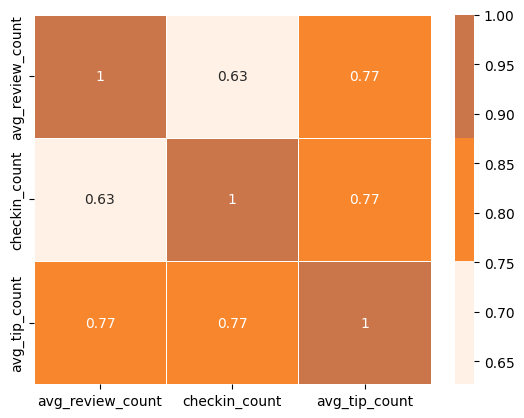

In [26]:
# Calculate the correlation matrix
corr = engagement_df[['avg_review_count', 'checkin_count', 'avg_tip_count']].corr()

# Define a custom color palette
custom_colors = ['#FFF1E5', '#F8862C', '#CB754B']

# Create a custom colormap
cmap = sns.color_palette(custom_colors, as_cmap=True)

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap=cmap, linewidths=0.5)

# Display the plot
plt.show()


***is there a diffrence between user engagement (review,tips, and check-ins) between high-reated and low-reated businwss ?***



In [27]:
engagement_df=pd.read_sql_query(f"""
    
        SELECT 
            b.business_id, 
            AVG(b.stars) AS avg_rating,
            SUM(b.review_count) AS avg_review_count,
            SUM(LENGTH(date) - LENGTH(REPLACE(date, ',', '')) + 1) AS checkin_count,
            SUM(tip.tip_count) AS avg_tip_count,
            (CASE WHEN b.stars>=3.5 THEN 'High-Reated' ELSE 'Low-Reated' END)as category
        FROM business b
        LEFT JOIN checkin cc ON b.business_id = cc.business_id
        LEFT JOIN (
            SELECT business_id, COUNT(business_id) AS tip_count 
            FROM tip 
            GROUP BY business_id
        ) AS tip ON b.business_id = tip.business_id
        WHERE b.business_id IN {tuple(business_id['business_id'])}
        GROUP BY b.business_id
   
   
""", conn).dropna()

In [28]:
engagement_df.groupby(engagement_df['category'])[['avg_review_count', 'checkin_count', 'avg_tip_count']].mean()


,avg_review_count,checkin_count,avg_tip_count
category,,,
High-Reated,72.291062,122.066641,10.162766
Low-Reated,42.123420,88.880828,6.541689


****Function to calculate success score based on the avg reating and totla review count****


In [29]:
def calculate_success_matric(df):
    success_score = []
    for index, row in df.iterrows():
        score = row['avg_rating'] * np.log1p(row['review_count']+1)
        success_score.append(score)
    return success_score

****how do sucess matrics (review count or avg_count) of resturent very accross diffrent state and city?****

In [30]:
city_df = pd.read_sql_query(f"""select city, state, latitude ,longitude ,
avg(stars) as avg_rating, sum(review_count) as review_count, count(*) as restaurant_count
from business
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY city, state
ORDER BY REVIEW_COUNT DESC
LIMIT 10""",conn)




In [31]:
city_df

,city,state,latitude,longitude,avg_rating,review_count,restaurant_count
0,Philadelphia,PA,39.955505,-75.155564,3.532156,175487,3001
1,Tampa,FL,27.890814,-82.502346,3.571429,104376,1715
2,Indianapolis,IN,39.637133,-86.127217,3.412111,92639,1701
3,Tucson,AZ,32.338572,-111.010760,3.386187,91613,1419
4,Nashville,TN,36.208102,-86.768170,3.493590,87070,1404
5,New Orleans,LA,29.963974,-90.042604,3.693676,69239,1012
6,Saint Louis,MO,38.583223,-90.407187,3.414303,51490,811
7,Reno,NV,39.476518,-119.784037,3.479626,48393,589
8,Edmonton,AB,53.436403,-113.604288,3.509379,45916,1546
9,Boise,ID,43.611192,-116.206275,3.558824,36104,561


In [32]:

city_df['sucess_score'] = calculate_success_matric(city_df)

In [33]:
city_df


,city,state,latitude,longitude,avg_rating,review_count,restaurant_count,sucess_score
0,Philadelphia,PA,39.955505,-75.155564,3.532156,175487,3001,42.651954
1,Tampa,FL,27.890814,-82.502346,3.571429,104376,1715,41.270622
2,Indianapolis,IN,39.637133,-86.127217,3.412111,92639,1701,39.022558
3,Tucson,AZ,32.338572,-111.010760,3.386187,91613,1419,38.688378
4,Nashville,TN,36.208102,-86.768170,3.493590,87070,1404,39.737804
5,New Orleans,LA,29.963974,-90.042604,3.693676,69239,1012,41.167305
6,Saint Louis,MO,38.583223,-90.407187,3.414303,51490,811,37.042397
7,Reno,NV,39.476518,-119.784037,3.479626,48393,589,37.535259
8,Edmonton,AB,53.436403,-113.604288,3.509379,45916,1546,37.671824
9,Boise,ID,43.611192,-116.206275,3.558824,36104,561,37.347057


In [175]:
import folium

# Define a function to classify success_score and return color
def get_marker_color(success_score):
    if success_score > 40:
        return 'green'  # High success
    elif success_score > 38:
        return 'orange'  # Medium success
    else:
        return 'red'  # Low success

# Calculate the mean latitude and longitude to center the map
map_center = [city_df['latitude'].mean(), city_df['longitude'].mean()]

# Create a Folium map centered on the calculated center
m = folium.Map(location=map_center, zoom_start=5)

# Add markers for each city in the DataFrame, with color based on success score
for index, row in city_df.iterrows():
    # Get the marker color based on success score
    marker_color = get_marker_color(row['sucess_score'])
    
    # Add a circle marker to differentiate based on success score
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=10,  # Marker size
        color=marker_color,
        fill=True,
        fill_color=marker_color,
        fill_opacity=0.7,
        popup=(
            f"City: {row['city']}, {row['state']}<br>"
            f"Avg Rating: {row['avg_rating']:.2f}<br>"
            f"Review Count: {row['review_count']}<br>"
            f"Restaurant Count: {row['restaurant_count']}<br>"
            f"Success Score: {row['sucess_score']:.2f}"
        ),
        tooltip=row['city']
    ).add_to(m)

# Add custom legend HTML
legend_html = '''
<div style="position: fixed; 
    bottom: 50px; left: 50px; width: 150px; height: 120px; 
    background-color: white; border:2px solid grey; z-index:9999; font-size:14px;">
    &nbsp;<b>Success Score Legend</b><br>
    &nbsp;<i class="fa fa-circle" style="color:green"></i>&nbsp; High Success (>40)<br>
    &nbsp;<i class="fa fa-circle" style="color:orange"></i>&nbsp; Medium Success (38-40)<br>
    &nbsp;<i class="fa fa-circle" style="color:red"></i>&nbsp; Low Success (<38)
</div>
'''

# Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file and display
m.save('city_success_map_with_legend.html')
m


In [ ]:
#how does the sentiment  of reviews and tips (useful , funny , cool) correlate with the sucess matrics restaurant ?

In [40]:
sentiment_df = pd.read_sql_query(f"""select b.business_id, avg(b.stars) as avg_rating , sum(b.review_count)as review_count,
sum(s.useful_count) as useful_count,
sum(s.funny_count) as funny_count,
sum(s.cool_count) as cool_count
from
(select business_id ,
sum(useful) as useful_count,
sum(funny) as funny_count,
sum(cool) as cool_count
from review 
group by business_id ) as s
join business as b on b.business_id = s.business_id 

where  b.business_id in {tuple(business_id['business_id'])}
group by b.business_id
order by review_count
""",conn)


In [41]:
sentiment_df

,business_id,avg_rating,review_count,useful_count,funny_count,cool_count
0,-3ArWZfDjfab8qVHf3WVtg,4.0,5,18,3,2
1,-4lNMmoW7gRxkH0c2dfXfA,4.0,5,1,0,0
2,-GqJOzN8AxFnkqSuvzmPtQ,5.0,5,8,5,6
3,-LoVysdztSNMiUeHCw8Ldg,4.0,5,5,0,4
4,-VXcrZIhuVElGIgJ03Hj9Q,4.5,5,0,0,1
...,...,...,...,...,...,...
16457,BJBSwMKADtYjqFDCL3-zkw,2.0,248,166,62,29
16458,MTB9CelShC-x4jj31BJYAg,3.5,248,96,31,39
16459,aOJDVHCn9iBIC33l_2HTRg,3.5,248,167,40,68
16460,l8yqThofpWGUs6lxOeIdOA,4.0,248,203,54,95


In [49]:
sentiment_df = remove_outliers(sentiment_df,'review_count')
sentiment_df = remove_outliers(sentiment_df,'useful_count')
sentiment_df = remove_outliers(sentiment_df,'funny_count') #remove outlier
sentiment_df = remove_outliers(sentiment_df,'cool_count')

In [50]:
sentiment_df

,business_id,avg_rating,review_count,useful_count,funny_count,cool_count
0,-3ArWZfDjfab8qVHf3WVtg,4.0,5,18,3,2
1,-4lNMmoW7gRxkH0c2dfXfA,4.0,5,1,0,0
2,-GqJOzN8AxFnkqSuvzmPtQ,5.0,5,8,5,6
3,-LoVysdztSNMiUeHCw8Ldg,4.0,5,5,0,4
4,-VXcrZIhuVElGIgJ03Hj9Q,4.5,5,0,0,1
...,...,...,...,...,...,...
12853,i45WZvp-Sg7MlELrHzlUxg,3.5,94,48,9,11
12857,lqMOJ_cVSvVU-lferJVPLg,4.5,94,72,7,15
12865,sTvFxzQU_4bm-owSJXx0MQ,3.0,94,64,11,11
12866,sVWJORAa2XoVmuOahZoZUg,3.0,94,35,14,13


In [52]:
sentiment_df['success_score'] = calculate_success_matric(sentiment_df)

In [59]:
sentiment_df.iloc[:,2:].corr()

,review_count,useful_count,funny_count,cool_count,success_score
review_count,1.000000,0.626448,0.462977,0.462918,0.643776
useful_count,0.626448,1.000000,0.675624,0.739239,0.498345
funny_count,0.462977,0.675624,1.000000,0.628652,0.262893
cool_count,0.462918,0.739239,0.628652,1.000000,0.534345
success_score,0.643776,0.498345,0.262893,0.534345,1.000000


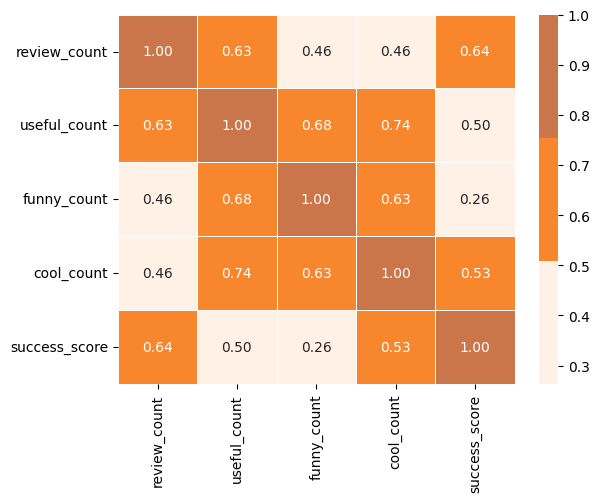

<Figure size 1400x1000 with 0 Axes>

In [87]:
corr = sentiment_df.iloc[:,2:].corr()

# Define a custom color palette
custom_colors = ['#FFF1E5', '#F8862C', '#CB754B']

# Create a custom colormap
cmap = sns.color_palette(custom_colors, as_cmap=True)

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap=cmap , linewidths=0.5, fmt='.2f')
plt.figure(figsize=(14, 10))
# Display the plot
plt.show()

In [89]:
# Is there any diffrence between Elite and no elite user ?

elite_df = pd.read_sql_query("""Select elite , count(*) as row_count, sum(review_count) as Total_review_count
from 
(select 
case when elite ='' Then 'Not Elite' Else 'Elite' END as elite
,u.review_count from user as u) as user_elite 
group by elite """,conn)

In [90]:
elite_df

,elite,row_count,Total_review_count
0,Elite,67197,16350751
1,Not Elite,926752,15927469


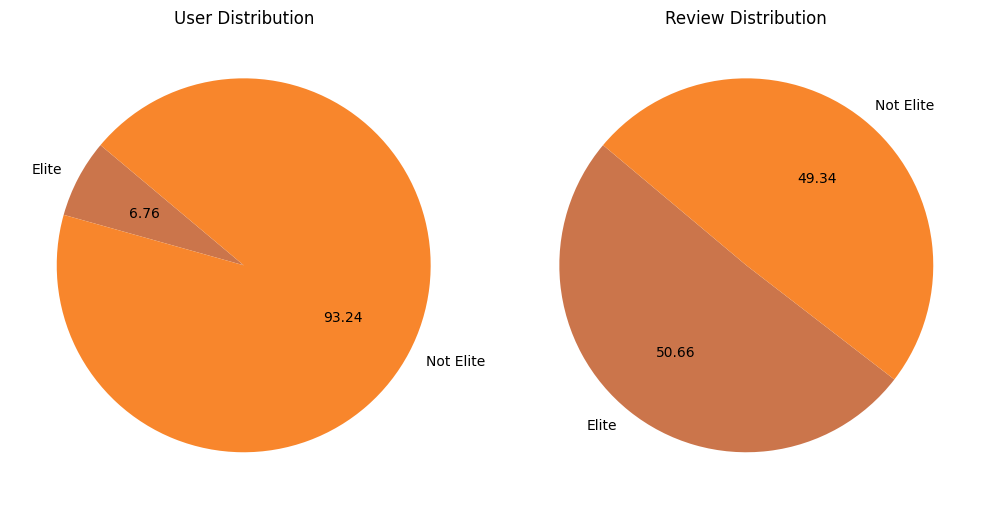

In [107]:
import matplotlib.pyplot as plt

# Assuming elite_df is already populated with the data
# Extracting the data dynamically from elite_df
labels = elite_df['elite'].tolist()
user_distribution = elite_df['row_count'].tolist()
review_distribution = elite_df['Total_review_count'].tolist()

# Create a figure with two subplots for User and Review Distribution
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot User Distribution Pie Chart
axes[0].pie(user_distribution, labels=labels, autopct='%.2f', colors=['#CB754B', '#F8862C'], startangle=140)
axes[0].set_title('User Distribution')

# Plot Review Distribution Pie Chart
axes[1].pie(review_distribution, labels=labels, autopct='%.2f', colors=['#CB754B', '#F8862C'], startangle=140)
axes[1].set_title('Review Distribution')

# Adjust layout for clarity
plt.tight_layout()
plt.show()


In [141]:
# what are the business hour for the restaurants?

review_engagement = pd.read_sql_query("""select 
cast(strftime('%H',date) as intiger) as Hour,
count(*) as review_count
from
review
group by Hour""",conn)

tip_engagement = pd.read_sql_query(""" select 
cast(strftime('%H',date) as intiger) as Hour,
count(*) as tip_count from tip
group by hour""",conn)

 


In [149]:
checkin= pd.read_sql_query("""select date from checkin """,conn)
checkin_endagement= []
for i in checkin['date']:
    checkin_endagement.extend([datetime.strptime(j.strip(),"%Y-%m-%d %H:%M:%S").strftime("%H") for j in  i.split(',')])

checkin_endagement= pd.DataFrame(checkin_endagement).astype('int').groupby(0)[[0]].count()   


In [143]:
review_engagement

,Hour,review_count
0,0,230361
1,1,228541
2,2,208278
3,3,169508
4,4,124236
5,5,80800
6,6,50376
7,7,29893
8,8,18944
9,9,15175


In [148]:
tip_engagement

,Hour,tip_count
0,0,74238
1,1,67568
2,2,54532
3,3,40093
4,4,27227
5,5,16977
6,6,10564
7,7,6428
8,8,4213
9,9,3399


In [150]:
checkin_endagement

,0
0,
0,1155092
1,935985
2,669574
3,437035
4,264905
5,152476
6,85066
7,52295
8,35589


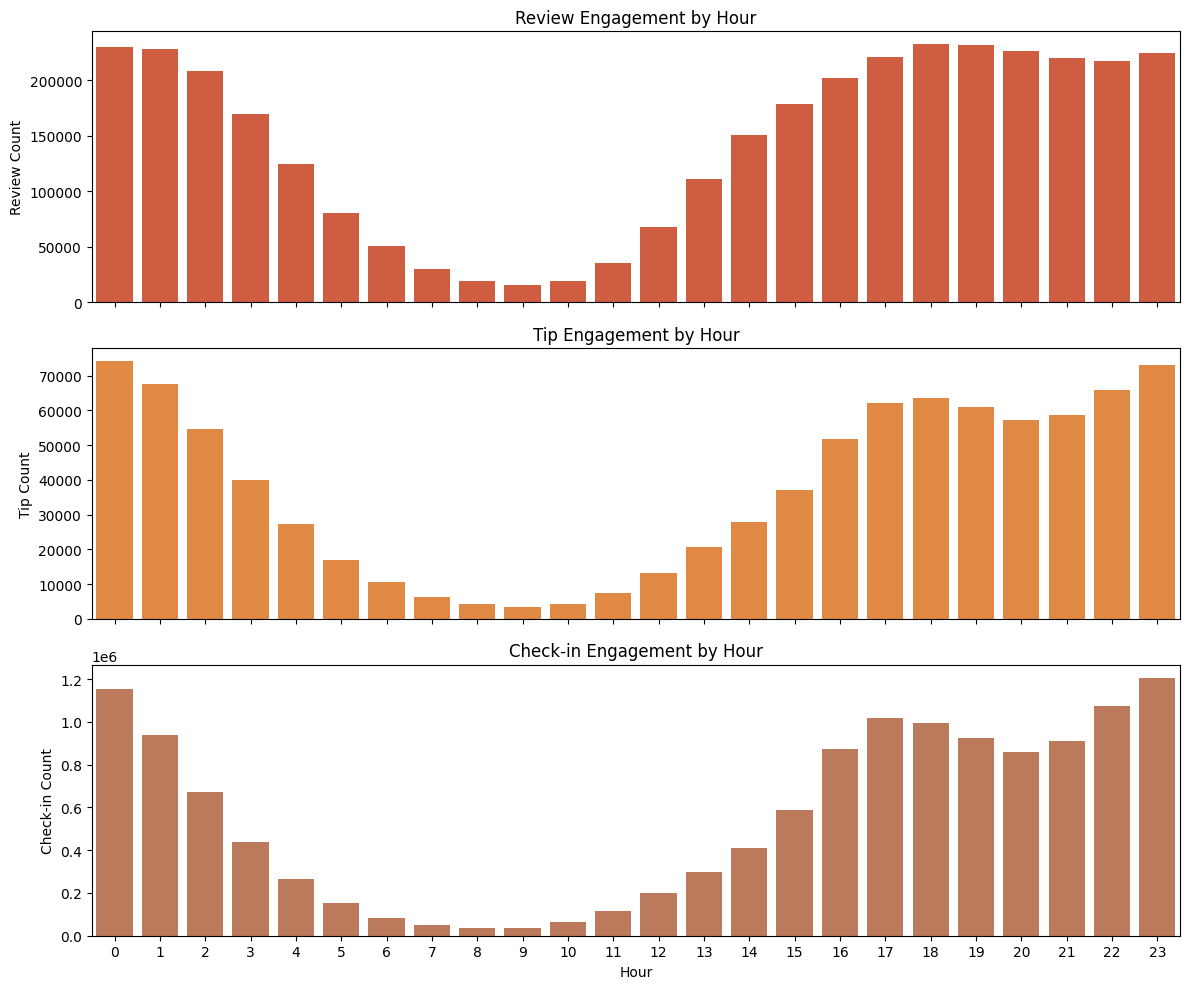

<Figure size 640x480 with 0 Axes>

In [183]:
# Set up the plotting area
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Plot for Review Engagement
sns.barplot(x='Hour', y='review_count', data=review_engagement, ax=axes[0], color='#E54F29')
axes[0].set_title('Review Engagement by Hour')
axes[0].set_ylabel('Review Count')
axes[0].set_xlabel('Hour of Day')

# Plot for Tip Engagement
sns.barplot(x='Hour', y='tip_count', data=tip_engagement, ax=axes[1], color='#F8862C')
axes[1].set_title('Tip Engagement by Hour')
axes[1].set_ylabel('Tip Count')
axes[1].set_xlabel('Hour of Day')

sns.barplot(x='Hour', y='Count', data=checkin_endagement_df, ax=axes[2], color='#CB754B')
axes[2].set_title('Check-in Engagement by Hour')
axes[2].set_ylabel('Check-in Count')

plt.tight_layout()
plt.show()

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()